In [43]:
#import some necessary libraries
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()
sns.set_style('darkgrid')
#import warnings
#def ignore_warn(*args, **kwargs):
#    pass
#warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import time

from scipy import stats
from scipy.stats import norm, skew, kurtosis, boxcox #for some statistics
from scipy.special import boxcox1p, inv_boxcox, inv_boxcox1p
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder, RobustScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output

StartTime = datetime.datetime.now()

In [44]:
class MyTimer():
    # usage:
    #with MyTimer():                            
    #    rf.fit(X_train, y_train)
    
    def __init__(self):
        self.start = time.time()
    def __enter__(self):
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        end = time.time()
        runtime = end - self.start
        msg = 'The function took {time} seconds to complete'
        print(msg.format(time=runtime))

In [45]:
df = pd.read_csv("./Rumah.comdataset_v2.csv")
df = df.drop(columns=['Property Link', 'ID'])
df['Listing Area'] = df['Listing Area'].str.replace(' m²', '')
df = df.astype({'Listing Area':'int64'})

y = df.Price
X = df.drop(['Price'], axis=1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                            train_size=0.8, test_size=0.2)

In [46]:
train = pd.concat([X_train_full, y_train], axis=1)
test = pd.concat([X_valid_full, y_valid], axis=1)

In [47]:
train.shape

(12286, 7)

# Data Preprocessing
## Outliers

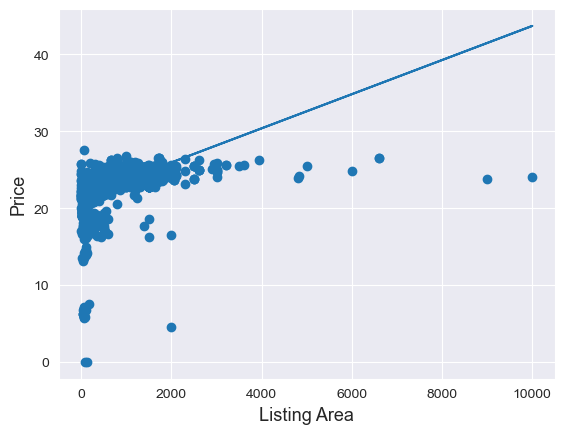

In [48]:
fig, ax = plt.subplots()
#ax.scatter(x = train['GrLivArea'], y = train['SalePrice']
ax.scatter(x = train['Listing Area'], y = np.log(train['Price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Listing Area', fontsize=13)

#m, b = np.polyfit(train['GrLivArea'], train['SalePrice'], 1)
m, b = np.polyfit(train['Listing Area'], np.log(train['Price']), 1)
#m = slope, b=intercept
plt.plot(train['Listing Area'], m*train['Listing Area'] + b)

plt.show()

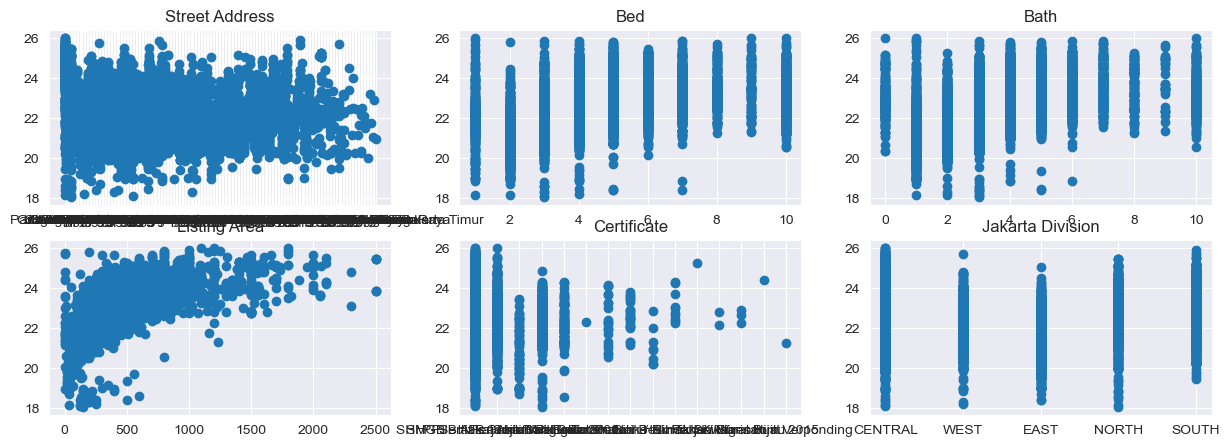

In [52]:
train.shape[1]
#a = int(np.sqrt(train.shape[1]))
a = 4
b = int(train.shape[1]/4)
r = int(train.shape[1]/a)
c = int(train.shape[1]/b)
i = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train[train.columns[i]], y = np.log(train['Price']))
            col.title.set_text(train.columns[i])
        except:
            temp=1
        #except Exception as e:
        #    print(e.message, e.args)
        finally:
            temp=1
        i = i + 1
        
plt.show()


In [50]:
train = train.drop(train[(train['Price']>230000000000) | (np.log(train['Price'])<18)].index)
train = train.drop(train[(train['Listing Area']>2500)].index)
train = train.drop(train[(train['Listing Area']>1000) & (np.log(train['Price'])<20)].index)

In [51]:
train.shape

(12169, 7)

In [16]:
test

,Street Address,Bed,Bath,Listing Area,Certificate,Jakarta Division,Price
7884,Cibubur,3,3,180,SHM - Sertifikat Hak Milik,EAST,1850000000.000
3976,Manggarai,2,1,38,SHM - Sertifikat Hak Milik,SOUTH,687000000.000
2070,Palmerah,2,3,66,SHM - Sertifikat Hak Milik,WEST,1500000000.000
12767,Cibubur,4,3,130,SHM - Sertifikat Hak Milik,EAST,1600000000.000
9898,Sunter,4,3,170,SHM - Sertifikat Hak Milik,NORTH,5900000000.000
...,...,...,...,...,...,...,...
2682,Kembangan,3,2,70,PPJB - Perjanjian Pengikatan Jual Beli,WEST,1500000000.000
1797,Kemayoran,10,10,314,SHM - Sertifikat Hak Milik,CENTRAL,3500000000.000
5261,Pondok Indah,5,7,699,SHM - Sertifikat Hak Milik,SOUTH,33000000000.000
8188,Sunter,4,3,104,SHM - Sertifikat Hak Milik,NORTH,1990000000.000


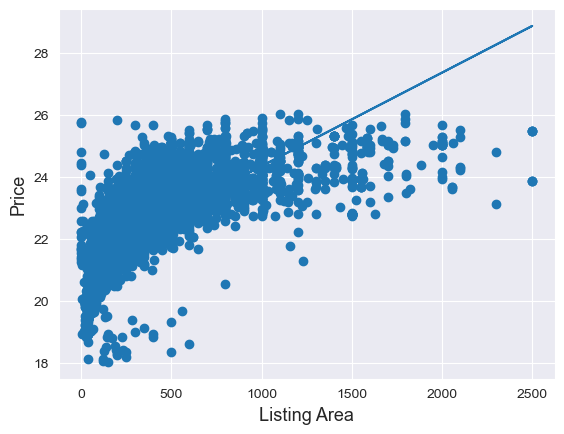

In [53]:
#check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['Listing Area'], np.log(train['Price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Listing Area', fontsize=13)
m, b = np.polyfit(train['Listing Area'], np.log(train['Price']), 1)
plt.plot(train['Listing Area'], m*train['Listing Area'] + b)
plt.show()

[3.01418277e-03 2.13384658e+01]


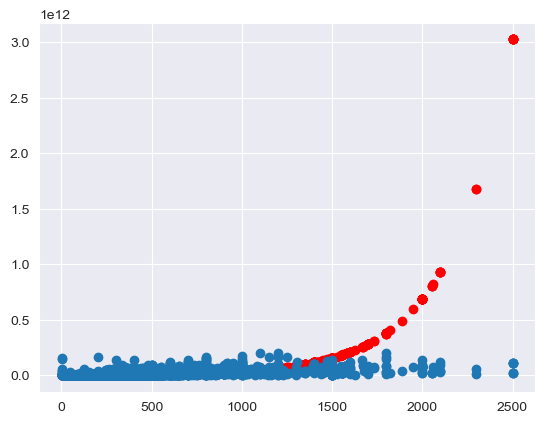

In [54]:
# linear 
x_data = train['Listing Area']
y_data = train['Price']
log_y_data = np.log(train['Price'])

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)

y = np.exp(2.13517338e+01) * np.exp(2.95469428e-03*x_data)
plt.plot(x_data, y_data, "o")
plt.scatter(x_data, y,c='red')

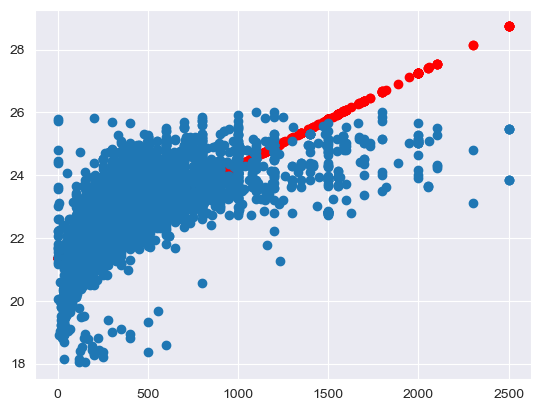

In [55]:
# linear with log y
y = np.exp(2.13517338e+01) * np.exp(2.95469428e-03*x_data)
plt.plot(x_data, np.log(y_data), "o")
plt.scatter(x_data, np.log(y),c='red')

In [56]:
# polynomial
x_data = train['Listing Area']
y_data = train['Price']
log_y_data = np.log(train['Price'])
curve_fit_gla = np.polyfit(x_data, y_data, 2)
y = curve_fit_gla[2] + curve_fit_gla[1]*x_data + curve_fit_gla[0]*x_data**2

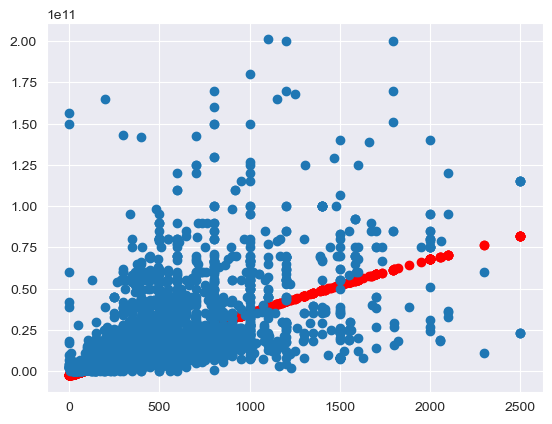

In [57]:
plt.plot(x_data, y_data, "o")
plt.scatter(x_data, y,c='red')

/Users/an-uigeun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


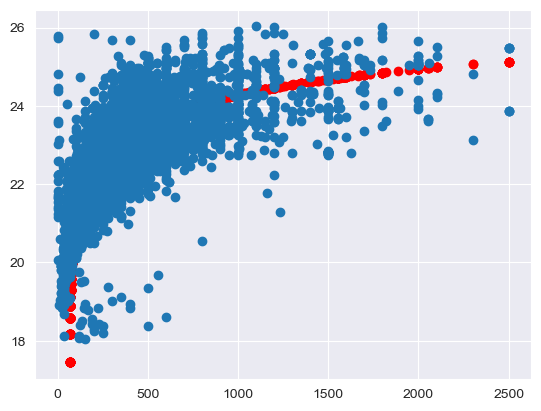

In [58]:
# polynomial with log y
plt.plot(x_data, np.log(y_data), "o")
plt.scatter(x_data, np.log(y),c='red')

/Users/an-uigeun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 9020646297.24 and sigma = 15230898622.39, skew = 4.78 kurtosis = 32.01



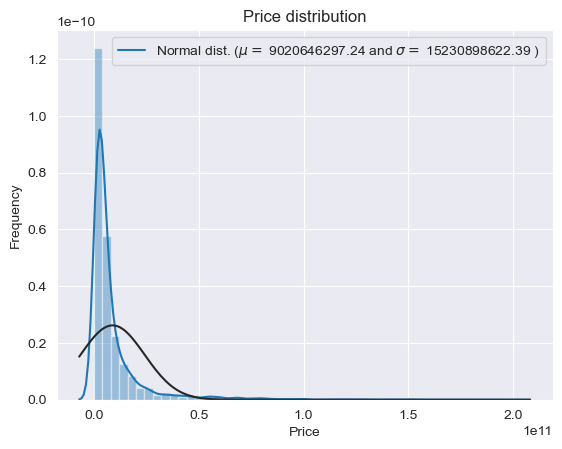

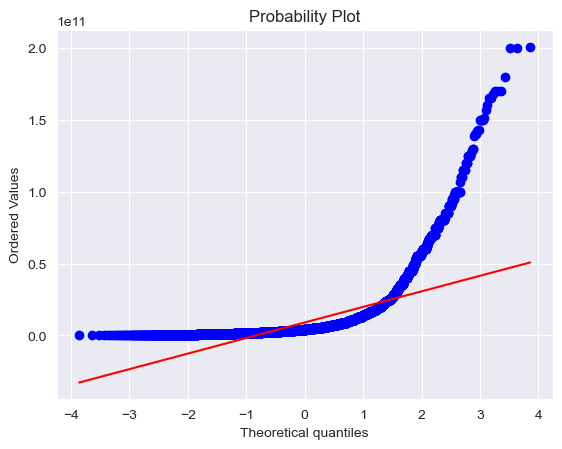

In [59]:
sns.distplot(train['Price'] , fit=norm)

_skew = skew(train['Price'])
_kurtosis = kurtosis(train['Price'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}, skew = {:.2f} kurtosis = {:.2f}\n'.format(mu, sigma, _skew, _kurtosis))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

In [60]:
lam_l = 0.10 # optimized value
train["Price"] = boxcox1p(train["Price"], lam_l)


/var/folders/tq/3cj6s19j7f1g4p6mxbhbvdh40000gn/T/ipykernel_8199/3389563975.py:2: RuntimeWarning: divide by zero encountered in log
  y1 = np.log(x)


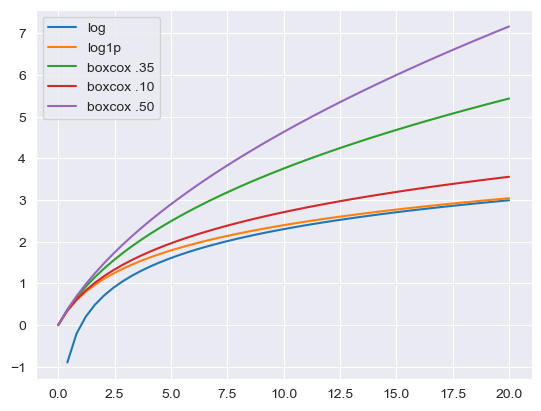

/var/folders/tq/3cj6s19j7f1g4p6mxbhbvdh40000gn/T/ipykernel_8199/3389563975.py:16: RuntimeWarning: divide by zero encountered in log
  y1 = np.log(x)


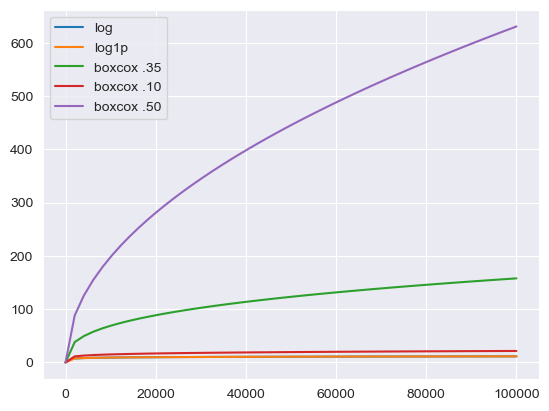

In [61]:
x = np.linspace(0, 20)
y1 = np.log(x)
y2 = np.log1p(x)
y3 = boxcox1p(x, 0.35)
y4 = boxcox1p(x, 0.10)
y5 = boxcox1p(x, 0.50)
plt.plot(x,y1,label='log') 
plt.plot(x,y2,label='log1p') 
plt.plot(x,y3,label='boxcox .35') 
plt.plot(x,y4,label='boxcox .10') 
plt.plot(x,y5,label='boxcox .50') 
plt.legend()
plt.show()

x = np.linspace(0, 100000)
y1 = np.log(x)
y2 = np.log1p(x)
y3 = boxcox1p(x, 0.35)
y4 = boxcox1p(x, 0.10)
y5 = boxcox1p(x, 0.50)
plt.plot(x,y1,label='log') 
plt.plot(x,y2,label='log1p') 
plt.plot(x,y3,label='boxcox .35') 
plt.plot(x,y4,label='boxcox .10') 
plt.plot(x,y5,label='boxcox .50') 
plt.legend()
plt.show()

/Users/an-uigeun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 82.99 and sigma = 10.57, skew = 0.65 kurtosis = 0.67



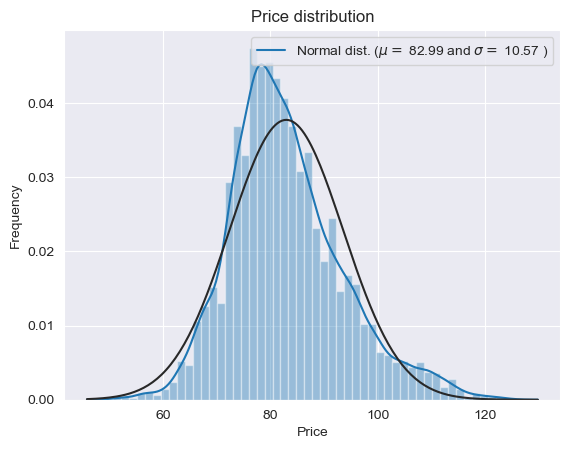

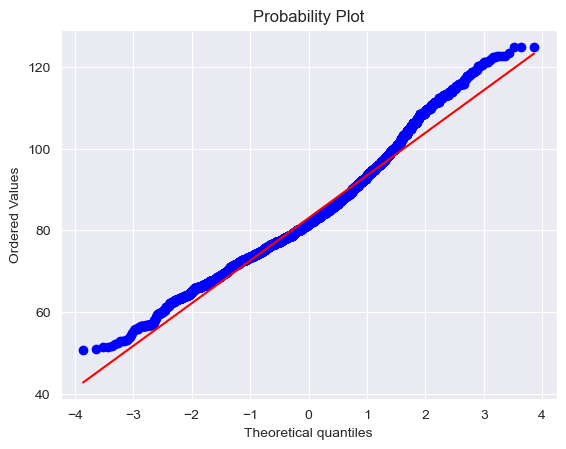

In [62]:
#Check the new distribution 
sns.distplot(train['Price'] , fit=norm);

_skew = skew(train['Price'])
_kurtosis = kurtosis(train['Price'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}, skew = {:.2f} kurtosis = {:.2f}\n'.format(mu, sigma, _skew, _kurtosis))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

In [63]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Price.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (15241, 6)


In [64]:
train.head()

,Street Address,Bed,Bath,Listing Area,Certificate,Jakarta Division,Price
1295,Menteng,6,6,1004,SHM - Sertifikat Hak Milik,CENTRAL,110.950
225,Sawah Besar,4,3,400,SHM - Sertifikat Hak Milik,CENTRAL,87.670
3332,Cengkareng,3,3,234,SHM - Sertifikat Hak Milik,WEST,78.047
13154,Lubang Buaya,6,3,200,SHM - Sertifikat Hak Milik,EAST,79.231
14656,Pantai Indah Kapuk,4,0,475,SHGB - Hak Guna Bangunan,NORTH,94.747


In [74]:
y_test

9600    10500000000.000
4354    11000000000.000
7428    62000000000.000
4066     5500000000.000
1266    40000000000.000
              ...      
6330      699990000.000
2125    12500000000.000
12112    1800000000.000
14090    7000000000.000
13729    1900000000.000
Name: Price, Length: 3072, dtype: float64

In [66]:
X_train = train.drop(['Price'],axis=1)
y_train = train.Price
X_test = test.drop(['Price'],axis=1)
y_test = test.Price

In [67]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [70]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_GBR =  GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample = 0.35, learning_rate = 0.05,random_state=1)
GBR_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_GBR)])
GBR_Pipeline.fit(X_train, y_train)
preds_GBR = GBR_Pipeline.predict(X_test)

In [73]:
preds_GBR.mean()

83.22873199762188

In [75]:
y_test.mean()

9824384152.791342

In [28]:
all_data.head(5)

,Street Address,Bed,Bath,Listing Area,Certificate,Jakarta Division
0,Joglo,3,2,80,SHM - Sertifikat Hak Milik,WEST
1,Bendungan Hilir,5,5,370,SHM - Sertifikat Hak Milik,CENTRAL
2,Glodok,3,2,69,SHM - Sertifikat Hak Milik,CENTRAL
3,Pondok Kelapa,4,4,200,SHM - Sertifikat Hak Milik,EAST
4,Meruya,4,4,300,SHM - Sertifikat Hak Milik,WEST


In [29]:
def add_gla(row, p):
    return (p[2] + p[1]*row['Listing Area'] + p[0]*(row['Listing Area']**2))

all_data['GrLivAreaPoly'] = all_data.apply(lambda row: add_gla(row,curve_fit_gla), axis=1)

In [30]:
all_data['Listing Area'][:ntrain]

0         80
1        370
2         69
3        200
4        300
        ... 
12152    150
12153    700
12154    644
12155    165
12156    405
Name: Listing Area, Length: 12157, dtype: int64

In [31]:
correlation_matrix = np.corrcoef(all_data['Listing Area'][:ntrain], y_train)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.5671607272551207


In [32]:
for i in range(1,11,1):
    j = i/10
    correlation_matrix = np.corrcoef(all_data['Listing Area'][:ntrain]**j, y_train)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    print(j, r_squared)

0.1 0.6804002267214789
0.2 0.6927003137917277
0.3 0.6956725527936534
0.4 0.6912709402227283
0.5 0.6808015333770221
0.6 0.6652277726076901
0.7 0.6453519850790164
0.8 0.6219104922372878
0.9 0.5956147424686848
1.0 0.5671607272551207


In [33]:
def add_gla2(row, p):
    return (row['Listing Area']**p)

all_data['GrLivAreaRoot'] = all_data.apply(lambda row: add_gla2(row,0.3), axis=1)

In [34]:
all_data.head()

,Street Address,Bed,Bath,Listing Area,Certificate,Jakarta Division,GrLivAreaPoly,GrLivAreaRoot
0,Joglo,3,2,80,SHM - Sertifikat Hak Milik,WEST,609830036.792,3.723
1,Bendungan Hilir,5,5,370,SHM - Sertifikat Hak Milik,CENTRAL,11979220539.015,5.895
2,Glodok,3,2,69,SHM - Sertifikat Hak Milik,CENTRAL,168051630.153,3.562
3,Pondok Kelapa,4,4,200,SHM - Sertifikat Hak Milik,EAST,5379256982.834,4.901
4,Meruya,4,4,300,SHM - Sertifikat Hak Milik,WEST,9283841474.739,5.535


<AxesSubplot:>

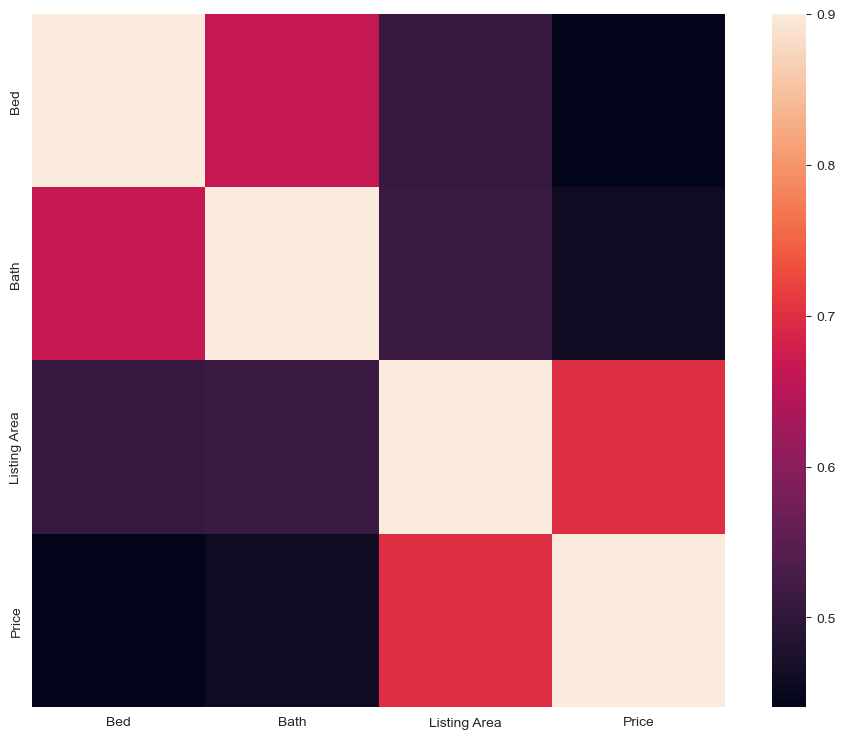

In [35]:
#Correlation map to see how features are correlated with each other and with SalePrice
corrmat = train.corr(method='kendall')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [36]:
print (corrmat['Price'].sort_values(ascending=False))

Price          1.000
Listing Area   0.698
Bath           0.459
Bed            0.441
Name: Price, dtype: float64


In [37]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Listing Area,5.297
GrLivAreaPoly,2.473
Bath,1.365
Bed,1.275
GrLivAreaRoot,0.717


In [38]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index

lam_f = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam_f)
    #all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 5 skewed numerical features to Box Cox transform


In [39]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(15229, 245)


In [40]:
all_data.columns

Index(['Bed', 'Bath', 'Listing Area', 'GrLivAreaPoly', 'GrLivAreaRoot',
       'Street Address_. Jl. Bekasi Raya', 'Street Address_. Jl. Lingkar Luar',
       'Street Address_Ampera', 'Street Address_Ancol', 'Street Address_Angke',
       ...
       'Certificate_Strata', 'Certificate_Surat Ijo / Surat Hijau',
       'Certificate_Tanah Eigendom Verponding',
       'Certificate_Tanah Girik / Rincik / Kikitir', 'Certificate_Warisan',
       'Jakarta Division_CENTRAL', 'Jakarta Division_EAST',
       'Jakarta Division_NORTH', 'Jakarta Division_SOUTH',
       'Jakarta Division_WEST'],
      dtype='object', length=245)

In [41]:
cols = ('Street Address', 'Certificate', 'Jakarta Division')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

KeyError: 'Street Address'

In [ ]:
pca = PCA().fit(all_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#Correlation map to see how features are correlated with each other and with SalePrice
corrmat = pd.DataFrame(all_data).corr(method='kendall')
plt.subplots(figsize=(12,9))
plt.title("Kendall's Correlation Matrix PCA applied", fontsize=16)
sns.heatmap(corrmat, vmax=0.9, square=True)


#Correlation map to see how features are correlated with each other and with SalePrice
corrmat = train.corr(method='kendall')
plt.subplots(figsize=(12,9))
plt.title("Kendall's Correlation Matrix Initial Train Set", fontsize=16)
sns.heatmap(corrmat, vmax=0.9, square=True);

In [ ]:
train_orig = train.copy()
train_orig['Price'] = y_train
corrmat = train_orig.corr(method='kendall')
print (corrmat['Price'].sort_values(ascending=False)[:])

In [ ]:
correlations = corrmat["Price"].sort_values(ascending=False)
features = correlations.index[0:10]
sns.pairplot(train[features], height = 2.5)
plt.show();

In [ ]:
all_data

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X = train
y = y_train
train, val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=201)#, stratify=y)

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [ ]:
test

In [ ]:
val